# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Importing NLP Packages

In [2]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
import re

# Reading the Data

# An Overview of how Genuine and Spam Mails Look like

,Unnamed: 0,label,text,label_num
0,605,ham,"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes .",0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see attached file : hplnol 09 . xls )\n- hplnol 09 . xls",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer .\nthe first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past .\nthe second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide .\nemail me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! )\nhave a great weekend , great golf , great fishing , great shopping , or whatever makes you happy !\nbobby",0
3,4685,spam,"Subject: photoshop , windows , office . cheap . main trending\nabasements darer prudently fortuitous undergone\nlighthearted charm orinoco taster\nrailroad affluent pornographic cuvier\nirvin parkhouse blameworthy chlorophyll\nrobed diagrammatic fogarty clears bayda\ninconveniencing managing represented smartness hashish\nacademies shareholders unload badness\ndanielson pure caffein\nspaniard chargeable levin\n",1


In [133]:
# How does the data look like
df = df[['label','text']]
df.head(3)

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."


# Preliminary analysis and Visualization of Text Data

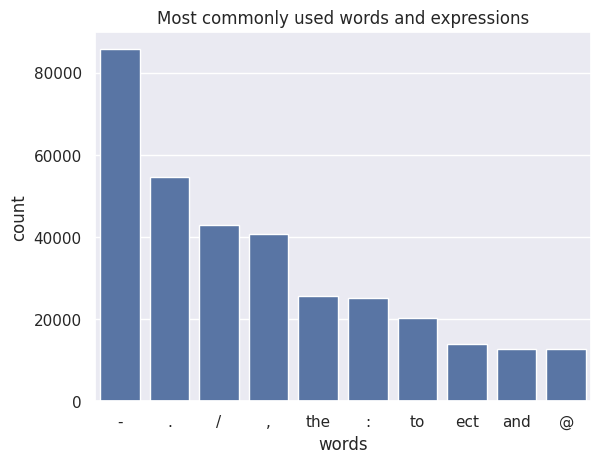

In [134]:
from collections import Counter
all_words = ' '.join(df['text'].values).split()
word_count = Counter(all_words)
most_common_words = word_count.most_common(10)
df1 = pd.DataFrame(data = most_common_words, columns= ['words','count'])
sns.barplot(data = df1, x = 'words', y = 'count')
plt.title('Most commonly used words and expressions')
plt.savefig('Most common words.jpeg')
plt.show()


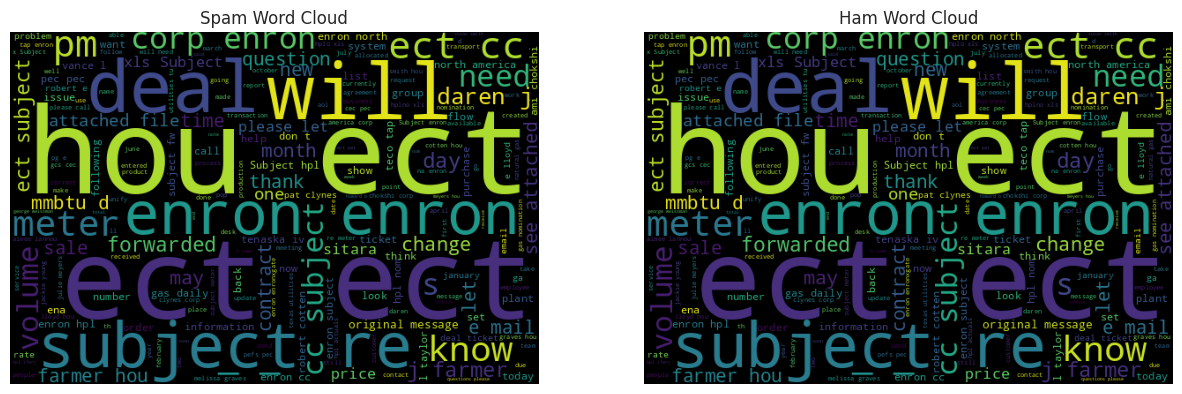

In [135]:
from wordcloud import WordCloud
wc = WordCloud(width = 600, height = 400, background_color ='black')
spam_text = df[df['label'] == 'spam']
spam_wc = wc.generate(' '.join(spam_text['text'].values))
ham_text = df[df['label'] == 'ham']
ham_wc = wc.generate(' '.join(ham_text['text'].values))

fig, ax = plt.subplots(1,2,figsize = (15,10))
ax[0].set_title('Spam Word Cloud')
ax[0].axis('off')
ax[0].imshow(spam_wc)
ax[1].set_title('Ham Word Cloud')
ax[1].imshow(ham_wc)
ax[1].axis('off')
plt.savefig('Word Cloud.jpeg')
plt.show()


In [142]:
df['label'] = np.where(df['label'] == 'ham', 1,0)

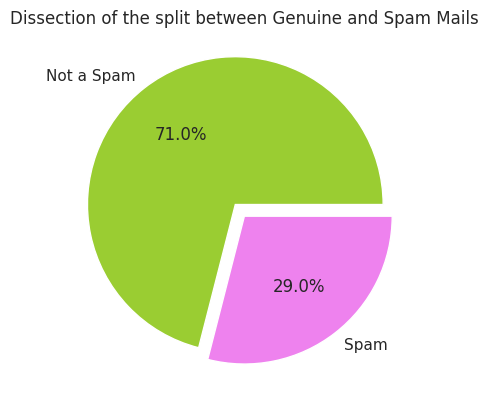

In [159]:
spam = df['label'].value_counts()[0]
ham = df['label'].value_counts()[1]
plt.pie(labels = ['Not a Spam','Spam'], x =[ham,spam],autopct = '%1.1f%%', colors = ['yellowgreen','violet'],explode =(0.1,0))
plt.title('Dissection of the split between Genuine and Spam Mails')
plt.savefig('Dissection of Spam and Genuine Mail.jpeg')
plt.show()

In [150]:
df['label'].value_counts()

,count
label,
1,3672
0,1499


In [103]:
x = df[['text']]
y = df[['label']]

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(preprocessor = clean_text)

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify = y)

In [106]:
x_train_dtm = count.fit_transform(x_train['text'])

In [107]:
x_test_dtm = count.transform(x_test['text'])

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf = RandomForestClassifier()
rf.fit(x_train_dtm, y_train)
y_pred = rf.predict(x_test_dtm)
print(accuracy_score(y_test, y_pred))
y_pred_train = rf.predict(x_train_dtm)
print(accuracy_score(y_train,y_pred_train))

0.9690821256038648
1.0


In [109]:
print(classification_report(y_test,y_pred))
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       300
           1       0.98      0.97      0.98       735

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1199
           1       1.00      1.00      1.00      2937

    accuracy                           1.00      4136
   macro avg       1.00      1.00      1.00      4136
weighted avg       1.00      1.00      1.00      4136



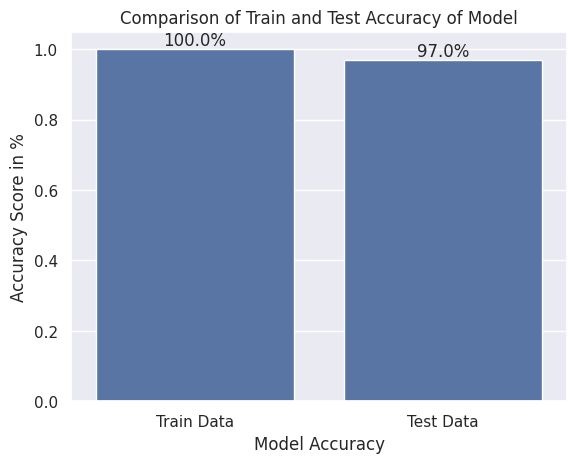

In [127]:

Values = [accuracy_score(y_train,y_pred_train), accuracy_score(y_test,y_pred)]
labels = ['Train Data', 'Test Data']
sns.barplot(x = labels , y = Values)
plt.title('Comparison of Train and Test Accuracy of Model')
plt.xlabel('Model Accuracy')
plt.ylabel('Accuracy Score in %')

for i, v in enumerate(Values):
    plt.annotate(f'{round(v, 2)*100:.1f}%', xy=(i, v), ha='center', va='bottom')


plt.savefig('Final output from Model.jpeg')
plt.show()